<a href="https://colab.research.google.com/github/IshanTharaka/CSC-369-2.0-Machine-Learning-I---Assignment/blob/main/Assignment_AS2019550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Name     : B.D.I.Tharaka
*   Index No : AS2019550


# 1. K-nearest neighbour algorithm (use Python ‘scikit-learn’ package)

In [966]:
import numpy as np   	# related to linear algebra
import pandas as pd	    # Used to retrieve data from the dataset 
import sklearn.metrics as sm
%matplotlib inline

Read and store the data set


In [967]:
Mobile_Dataset = pd.read_csv('/content/Mobile_Dataset.csv')	# read and store the csv file (import)
Mobile_Dataset  # show tha dataset  

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Summary details of the data set.

In [968]:
Mobile_Dataset.describe()	# Summary details of the data set. (mean,count,std,min,etc)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Data Pre-processing.

In [969]:
sum(Mobile_Dataset.isnull().sum())	# check null values in the dataset


0

In [970]:
# Print the number of values ​​that have zero values with attributes.
print((Mobile_Dataset
       [["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]==0).sum())

battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
dtype: int64


In [971]:
# replce the zero values with NAN.
Mobile_Dataset[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']] = Mobile_Dataset[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].replace(0,np.NAN)
Mobile_Dataset    # Print the updated data set with NAN values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,NaN,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,NaN,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,NaN,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,NaN,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


In [972]:
print(Mobile_Dataset.isnull().sum())    # check the null values in the dataset.

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc               474
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64


In [973]:
Mobile_Dataset=Mobile_Dataset.fillna(Mobile_Dataset.mean())	# replace NAN values with mean values
Mobile_Dataset    # Print the updated data set with mean values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,5.6481,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,5.6481,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0000,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,5.6481,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,5.6481,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0000,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0000,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


Normalization and Transformation

In [974]:
# Encoding data columns 
from sklearn.preprocessing import LabelEncoder		
label_encoder = LabelEncoder()		# Create a object from LabelEncoder 
data_transform = Mobile_Dataset.copy() 	# get a copy of dataset to transfrom
for data in Mobile_Dataset.columns:
	data_transform[data] = label_encoder.fit_transform(Mobile_Dataset[data])		# converting string labels into numbers

data_transform		# print the transformed dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,255,0,17,0,0,0,5,5,108,1,...,17,186,963,4,7,17,0,0,1,1
1,382,1,0,1,5,1,51,6,56,2,...,738,1099,998,12,2,5,1,1,0,2
2,48,1,0,1,1,1,39,8,65,4,...,962,901,984,6,1,7,1,1,0,2
3,88,1,20,0,5,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,954,1,7,0,13,1,42,5,61,1,...,928,517,499,3,1,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,5,1,0,7,26,5,...,939,1022,180,8,3,17,1,1,0,0
1996,1064,1,21,1,5,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,1027,0,4,1,0,1,34,6,28,7,...,716,834,1158,4,0,3,1,1,0,3
1998,732,0,4,0,3,1,44,0,65,4,...,282,120,266,13,10,17,1,1,1,0


Feature extraction

In [975]:
x = data_transform.drop(['price_range'],axis = 1)	# Output without the price_range column (Features / inputs)
print(x)   # print the features.

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               255     0           17         0   0       0           5   
1               382     1            0         1   5       1          51   
2                48     1            0         1   1       1          39   
3                88     1           20         0   5       0           8   
4               954     1            7         0  13       1          42   
...             ...   ...          ...       ...  ..     ...         ...   
1995            216     1            0         1   5       1           0   
1996           1064     1           21         1   5       0          37   
1997           1027     0            4         1   0       1          34   
1998            732     0            4         0   3       1          44   
1999              8     1           15         1   4       1          43   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0        

In [976]:
y = data_transform['price_range']	# Only price_range column (target / label / output)
print(y)   # print the target

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


Target extraction

In [977]:
data_feture_list = list(x.columns)    # features list
print(data_feture_list)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


Scaling

With min-max scaler, accuracy is low.

In [978]:
# from sklearn.preprocessing import MinMaxScaler    # min max scaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
# print(x)

Splitting Dataset (Training and Test data)

In [979]:
from sklearn.model_selection import train_test_split    # Import train_test_split function

In [980]:
# Split dataset into training set and test set
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 20)	# 0.2 = 20% test data and 80% = training data 

In [981]:
print(X_train)      # print x(feature) training data set

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1500            535     0            2         1   6       0          58   
451             349     1           12         0   5       1          52   
1627            273     0           24         0   4       0          14   
669             169     0            0         0   5       1           1   
1567            327     0           24         0   5       0          14   
...             ...   ...          ...       ...  ..     ...         ...   
924            1065     0            3         1  15       1          46   
1247            773     1            0         1   5       0          18   
271             176     0           16         1   5       1           2   
474            1067     0            4         0   5       0          20   
1379            203     0           24         0   1       0          60   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1500     

In [982]:
print(Y_train)      # print y(target) training data set

1500    2
451     1
1627    3
669     1
1567    1
       ..
924     2
1247    1
271     0
474     2
1379    1
Name: price_range, Length: 1600, dtype: int64


In [983]:
print(X_test)     # print x(feature) test data set

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1556            281     1            9         1   0       1          41   
1560            996     0            0         0   4       1          24   
1559            128     0           24         0   7       1           0   
1594             65     1            1         0  16       1          40   
906            1081     1            7         1   6       1          25   
...             ...   ...          ...       ...  ..     ...         ...   
959             776     0            0         1   2       0          31   
1939            789     1           20         0  12       1           2   
668             855     0           13         1   3       0           9   
534             838     1           11         1   5       0          14   
1111            896     1           14         1   5       1          57   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1556     

In [984]:
print(Y_test)     # print y(target) test data set

1556    3
1560    2
1559    2
1594    1
906     3
       ..
959     3
1939    2
668     3
534     2
1111    3
Name: price_range, Length: 400, dtype: int64


In [985]:
print(X_train.shape,Y_train.shape)     # print training data shape(feature and target)

(1600, 20) (1600,)


In [986]:
print(X_test.shape,Y_test.shape)     # print test data shape(feature and target)

(400, 20) (400,)


**Building the model (KNN) for K=5**


In [987]:
from sklearn.neighbors import KNeighborsClassifier    # Import knearest neighbors Classifier model
model_knn = KNeighborsClassifier(n_neighbors=7)   # Create KNN Classifier

Fitting the model

In [988]:
model_knn.fit(X_train,Y_train)    # Train the model using the training sets

KNeighborsClassifier(n_neighbors=7)

Predication

In [989]:
y_pred = model_knn.predict(X_test)    # Predict the response for test dataset
print(y_pred)   # print the predicted responses

[3 2 1 1 3 2 2 1 3 2 0 2 2 1 3 2 2 1 2 3 3 3 0 0 3 2 3 1 3 0 3 2 0 2 0 0 3
 0 2 0 2 3 3 0 0 1 1 1 3 1 3 0 1 1 1 0 3 1 1 3 3 1 2 1 1 2 1 2 0 1 1 3 3 0
 0 2 0 0 2 0 1 1 2 2 0 0 2 2 3 0 3 3 1 0 0 0 1 1 1 1 1 1 1 2 3 2 1 2 2 2 0
 2 2 1 3 3 3 0 3 1 2 0 1 0 2 3 0 1 1 0 2 0 0 1 0 1 3 2 1 2 1 3 2 2 0 1 3 1
 2 0 2 0 2 0 3 3 2 2 1 2 0 0 3 3 2 2 2 2 3 3 1 2 3 1 1 3 1 2 0 3 1 1 1 1 1
 0 2 1 0 3 2 3 1 3 2 2 1 2 3 2 1 0 1 1 2 1 2 3 3 0 3 3 1 2 0 0 3 2 2 3 1 0
 2 2 3 0 3 1 2 1 0 1 0 2 1 3 0 1 3 0 1 1 1 2 3 0 1 2 0 2 1 2 3 0 2 3 1 3 1
 0 1 3 2 0 1 1 1 1 1 3 0 1 2 0 3 3 3 3 3 2 2 0 2 0 0 0 1 3 2 2 3 3 3 1 1 3
 1 1 2 2 3 1 0 1 3 3 2 0 0 1 3 1 0 1 0 2 0 3 2 2 3 0 2 2 1 0 0 2 2 2 3 1 3
 3 1 3 3 3 3 3 0 0 1 0 3 0 3 2 0 1 1 1 3 0 3 2 1 2 0 3 0 2 2 1 1 2 2 1 0 2
 2 3 2 0 2 0 0 3 0 1 3 3 3 3 1 2 2 0 0 2 0 3 3 2 2 3 2 3 2 3]


In [990]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,y_pred)    # calculate the mean absolute error
print("Mean Absolute Error : %.3f " % mae)      # print the mean absolute error

Mean Absolute Error : 0.110 


Evaluation (Evaluate classification model is accuracy)


In [991]:
from sklearn.metrics import accuracy_score      
accuracy_knn = accuracy_score(Y_test,y_pred)       # calculate the accuracy using accuracy_score function
print(f"Accuracy : {accuracy_knn}")      # print the accuracy

Accuracy : 0.89


Confusion matrix

In [992]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred,labels=[0,1,2,3])   # calculate the confusion matrix
print("Confusion Matrix : ")
print(cm)     # print the confusion matrix

Confusion Matrix : 
[[83  5  0  0]
 [ 6 88  4  0]
 [ 0 11 93 10]
 [ 0  0  8 92]]


Normalized confusion matrix (In order to get percentages instead of numbers)

In [993]:
print("Normalized Confusion Matrix : ")
cm_normalized = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)    # Convert one dimentional array to two dimentional array which is column-wise
print(cm_normalized)    


Normalized Confusion Matrix : 
[[0.94 0.06 0.   0.  ]
 [0.06 0.9  0.04 0.  ]
 [0.   0.1  0.82 0.09]
 [0.   0.   0.08 0.92]]


Heatmaps

In [994]:
import seaborn as sns    # to plot confusion matrix heatmap
import matplotlib.pyplot as plt 	# plot the charts

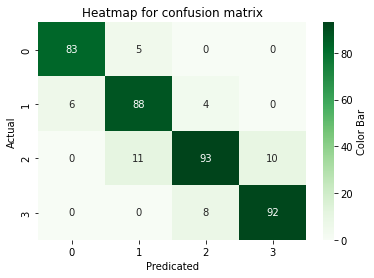

In [995]:
sns.heatmap(cm,cmap='Greens',annot=True,
            cbar_kws={"orientation" : "vertical" , "label" : "Color Bar"},
            xticklabels=[0,1,2,3],yticklabels=[0,1,2,3])    # plot the heatmap for confusion matrix
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Heatmap for confusion matrix")
plt.show()

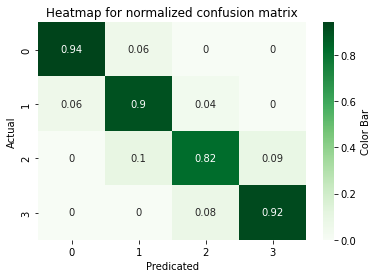

In [996]:
sns.heatmap(cm_normalized,cmap='Greens',annot=True,
            cbar_kws={"orientation" : "vertical" , "label" : "Color Bar"},
            xticklabels=[0,1,2,3],yticklabels=[0,1,2,3])      # plot the heatmap for normalized confusion matrix
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Heatmap for normalized confusion matrix")
plt.show()

F-measure

In [997]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test,y_pred,average='weighted')     # calculate the f1 score
print(f"f1 : {f1}")     # print the f1 score

f1 : 0.8895705969482484


Recall 

In [998]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test,y_pred,average='micro')    # calculate the recall score
print(f"Recall : {recall}")     # print the recall score

Recall : 0.89


Precision

In [999]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test,y_pred,average='macro')      # calculate the precision score
print(f"Precision : {precision}")     # print the precision score

Precision : 0.8916032964611946


In [1000]:
from sklearn import metrics
print("Classification Report : ")
print(metrics.classification_report(y_pred,Y_test,target_names=["0","1","2","3"]))  # print the classification report

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.90      0.85      0.87       104
           2       0.82      0.89      0.85       105
           3       0.92      0.90      0.91       102

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



# 2. Multi-layer neural network (use ‘Keras’)

In [1001]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np 

Read and store dataset

In [1002]:
df = pd.read_csv('/content/Mobile_Dataset.csv')     
df    # print the dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [1003]:
mobile_dataset = df.values    # to convert dataframe into arrays 
mobile_dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

Feature extraction

In [1004]:
X_features = mobile_dataset[:,0:20]     # input features 
X_features

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

Target extraction

In [1005]:
Y_targets = mobile_dataset[:,20]    # label or target
print(Y_targets)

[1. 2. 2. ... 3. 0. 3.]


Normalization and Transformation

In [1006]:
from sklearn.preprocessing import MinMaxScaler    # min max scaler
scaler = MinMaxScaler()
X_features = scaler.fit_transform(X_features)
print(X_features)

[[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


Splitting Dataset (Training, Test and Validation data)

In [1007]:
# 0.2 = 20% test data(include validation data) and 80% = training data
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(X_features,Y_targets, test_size=0.2 , random_state=20)

In [1008]:
print(x_val_and_test)   # print validation and test data (features)

[[0.249833   1.         0.36       ... 1.         0.         0.        ]
 [0.91583166 0.         0.         ... 1.         0.         1.        ]
 [0.11356045 0.         0.96       ... 1.         0.         0.        ]
 ...
 [0.78557114 0.         0.52       ... 1.         0.         0.        ]
 [0.77154309 1.         0.44       ... 1.         1.         1.        ]
 [0.8243153  1.         0.56       ... 1.         1.         0.        ]]


In [1009]:
print(y_val_and_test)   # print validation and test data (target)

[3. 2. 2. 1. 3. 2. 2. 1. 3. 2. 0. 2. 3. 1. 3. 2. 2. 2. 2. 3. 3. 2. 0. 0.
 3. 2. 3. 1. 2. 0. 2. 2. 0. 2. 0. 0. 3. 0. 2. 0. 2. 3. 3. 1. 0. 2. 1. 1.
 3. 0. 3. 0. 1. 1. 1. 0. 3. 1. 2. 3. 3. 0. 2. 1. 1. 2. 1. 3. 0. 1. 1. 3.
 3. 0. 0. 2. 0. 0. 2. 0. 1. 1. 2. 2. 0. 0. 2. 2. 3. 0. 3. 3. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 2. 3. 2. 1. 2. 2. 2. 0. 2. 2. 1. 3. 3. 3. 0. 3. 1.
 2. 0. 1. 0. 2. 3. 0. 2. 1. 0. 2. 0. 0. 1. 1. 1. 3. 2. 2. 2. 1. 2. 2. 1.
 0. 1. 3. 1. 2. 0. 2. 0. 2. 0. 3. 3. 2. 2. 1. 2. 0. 0. 3. 3. 2. 2. 2. 2.
 3. 3. 1. 1. 2. 1. 1. 3. 1. 2. 0. 3. 1. 1. 2. 1. 0. 0. 2. 1. 0. 3. 2. 3.
 1. 2. 2. 2. 1. 2. 3. 2. 1. 1. 1. 2. 2. 1. 3. 3. 3. 0. 3. 3. 1. 3. 0. 0.
 2. 2. 2. 3. 1. 0. 2. 2. 3. 0. 2. 1. 2. 1. 0. 1. 1. 2. 1. 3. 0. 1. 3. 0.
 2. 1. 1. 2. 3. 0. 1. 1. 0. 2. 1. 2. 3. 0. 2. 3. 1. 3. 1. 0. 1. 3. 2. 0.
 1. 1. 1. 1. 1. 3. 0. 1. 2. 0. 3. 3. 3. 3. 3. 3. 2. 0. 3. 0. 1. 1. 1. 3.
 2. 2. 3. 3. 3. 1. 1. 3. 1. 1. 1. 2. 3. 0. 0. 1. 3. 3. 2. 0. 0. 2. 3. 1.
 0. 1. 0. 2. 0. 3. 2. 2. 3. 0. 2. 3. 1. 0. 0. 2. 2.

In [1010]:
# val_and_test size equally to the validation set and the test set.
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)  # 0.5 = 50% test data and 50% = validation data

In [1011]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)     # shapes of the arrays 

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


**Building the model (Multi-layer neural network)**


In [1012]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model_mln = Sequential([
 Dense(16, activation="relu", input_shape=(20,)),
 Dense(16,activation='relu'),
 Dense(4,activation='softmax')
])

In [1013]:
model_mln.summary()   # summary details about the model

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                336       
                                                                 
 dense_52 (Dense)            (None, 16)                272       
                                                                 
 dense_53 (Dense)            (None, 4)                 68        
                                                                 
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [1014]:
model_mln.compile(
    optimizer = Adam(),    # optimizer='sgd'
    loss = SparseCategoricalCrossentropy(),  # loss='categorical_crossentropy'
    metrics=['accuracy'])    # metrics="accuracy" 

Fitting the model

In [1015]:
BATCH_SIZE = 128
EPOCHES = 100
VERBOSE = 1

# to train the model  
model_history = model_mln.fit(x=x_train, y=y_train,validation_data=(x_val, y_val), batch_size=BATCH_SIZE ,verbose=VERBOSE, epochs=EPOCHES)  # 

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 1.3946 - accuracy: 0.2400 - val_loss: 1.3889 - val_accuracy: 0.2250
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 1.3832 - accuracy: 0.2625 - val_loss: 1.3833 - val_accuracy: 0.2600
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 1.3749 - accuracy: 0.2944 - val_loss: 1.3765 - val_accuracy: 0.2650
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1.3679 - accuracy: 0.3100 - val_loss: 1.3724 - val_accuracy: 0.2850
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1.3593 - accuracy: 0.3475 - val_loss: 1.3654 - val_accuracy: 0.3150
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3500 - accuracy: 0.3638 - val_loss: 1.3551 - val_accuracy: 0.3200
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3375 - accuracy: 0.3713 - val_loss: 1.3397 - val_accuracy: 0.3650
Epoch 8/100


Evaluating the model

In [1016]:
scores = model_mln.evaluate(x_test, y_test,verbose=1)    # evaluate the model
accuracy_mln = scores[1]
print('Test score :', scores[0]) 
print('Test accuracy :', scores[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9250
Test score : 0.19949506223201752
Test accuracy : 0.925000011920929


Predication

In [1017]:
def prediction_release(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [1018]:
predicts_test = model_mln.predict(x_test)      
test_predicts = prediction_release(predicts_test)

7/7 [==============================] - 0s 3ms/step


In [1019]:
y_classes = predicts_test.argmax(axis=-1)
print("True class = ", y_test[0], "Predicted class = ", y_classes[0])

True class =  0.0 Predicted class =  0


Precision, Recall and F-measure

In [1020]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_predicts))  # print the classification report

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        42
         1.0       0.96      0.92      0.94        49
         2.0       0.91      0.88      0.89        56
         3.0       0.91      0.92      0.92        53

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.92       200



Plotting the model performances

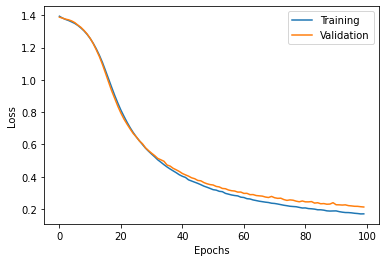

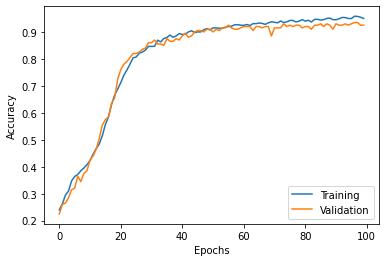

In [1021]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()        # Plot of the loss with epochs
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()        # Plot of the accuracy with epochs
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(model_history)


Compare the K-nearest neighbour algorithm and Multi-layer neural network


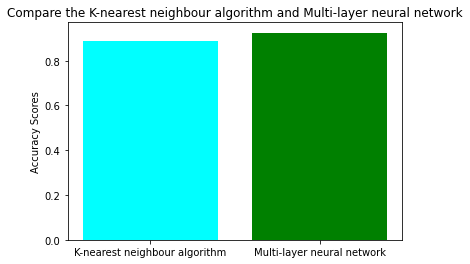

In [1022]:
models = ['K-nearest neighbour algorithm','Multi-layer neural network']
accuracy_scores = [accuracy_knn, accuracy_mln]

plt.bar(models, accuracy_scores, color=['cyan', 'green'])
plt.ylabel("Accuracy Scores")
plt.title("Compare the K-nearest neighbour algorithm and Multi-layer neural network")
plt.show()